In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [4]:
customers = pd.read_csv("Ecommerce Customers.csv")


In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Analysing the link between time spent on website and yearly amount spent using seaborn's jointplot

### As we can see from the graph below, there isn't much correlation between the time spent on website nd yearly amount spent

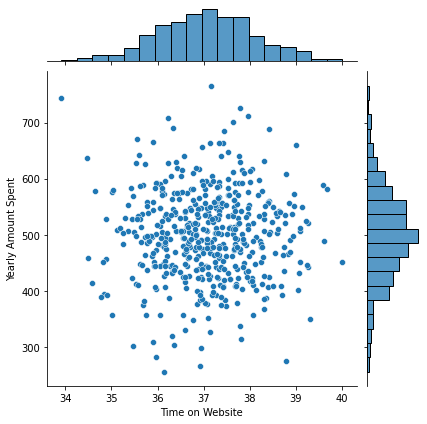

In [12]:
sns.jointplot(x= 'Time on Website',y = 'Yearly Amount Spent',data = customers)

## Let's see the correlation between time spent on app and yearly amount spent

### As we can see from the figure below, there is a significant relation between time spent on app and yearly amount spent

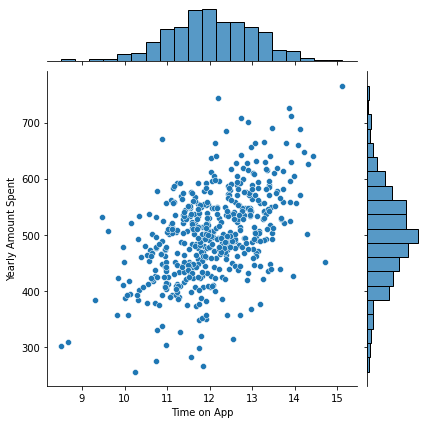

In [13]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers)

## Let's see some relation between time on app and length of membership

In [15]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

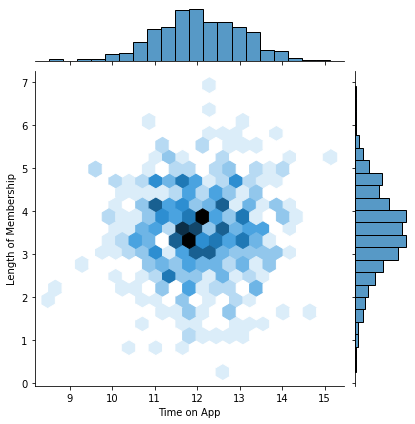

In [17]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers,kind='hex')

## Let's explore all relation between various features

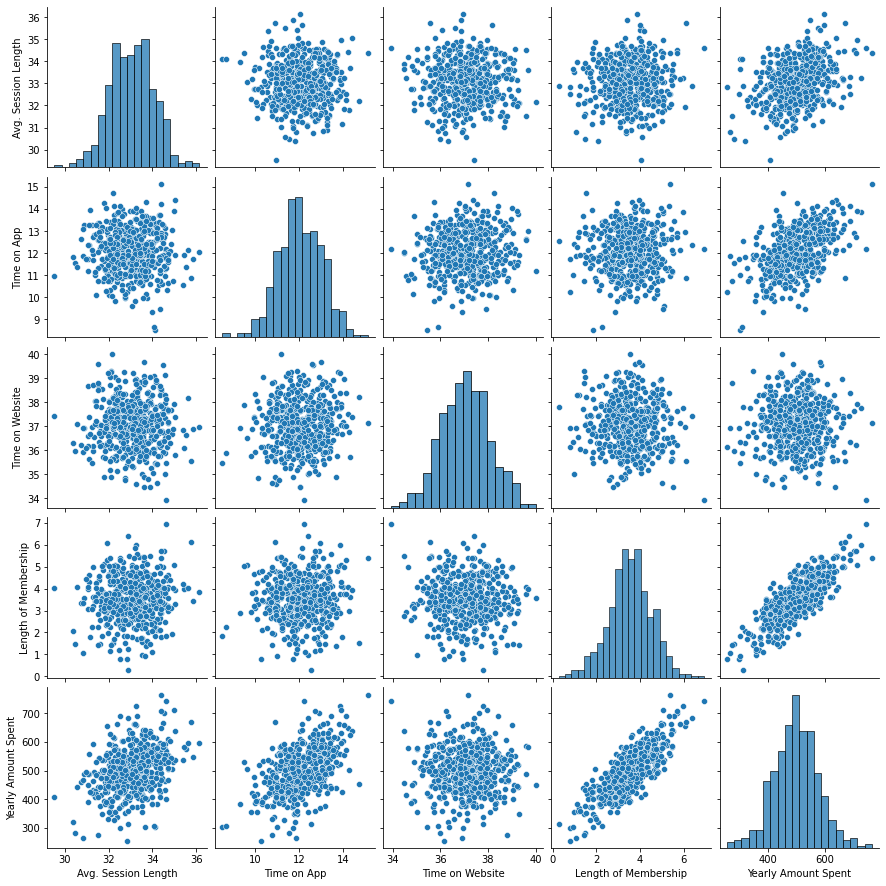

In [19]:
plt.tight_layout
sns.pairplot(data=customers)

## From the above figures we can see that length of membership is most related to yearly amount spent. So let's find the linear correlation between them

In [24]:
##sns.set_theme(style='darkgrid',palette='deep')

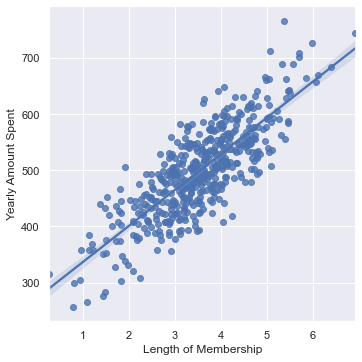

In [25]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Now we will build a model to predict yearly amount spent based on the numerical features of the dataset

In [26]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [38]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']


In [32]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [57]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Value for Yearly Amount Spent')

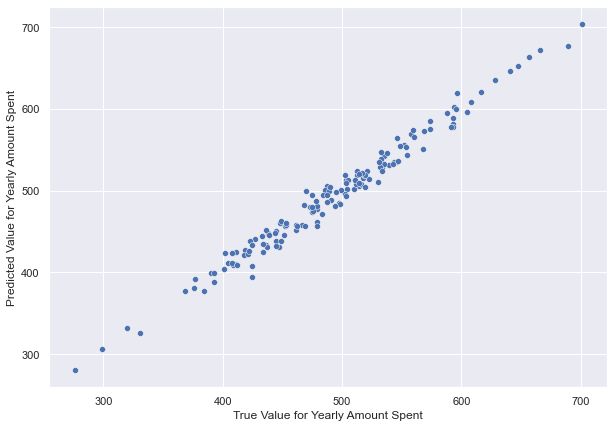

In [65]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = y_test,y = predictions)
plt.xlabel('True Value for Yearly Amount Spent')
plt.ylabel('Predicted Value for Yearly Amount Spent')


## Evaluating our model

In [66]:
from sklearn import metrics

In [68]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions) )
print('MSE: ',metrics.mean_squared_error(y_test,predictions) )
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  8.42609164143206
MSE:  103.91554136503261
RMSE:  10.19389726086312


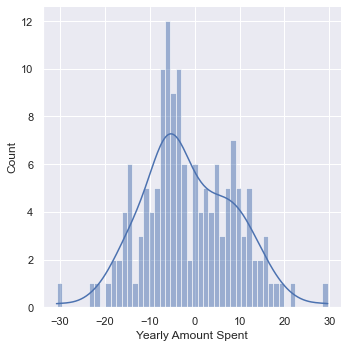

In [75]:
sns.displot((y_test-predictions),kde = True, bins=50)

In [76]:
cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'] )

In [77]:
cdf

,Coefficient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


## We can see that Length of Membership and Time on App influence the Yearly Amount Spent the most!